# WeatherPy
----
A minimum of 500 unique (non-repeat) cities were sampled based on latitude and longitude.
The following plots were generated:

#### Latitude vs. Cloudiness
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Latitude vs. Humidity (%)

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as rq
import time, json, csv
import plotly
import plotly.graph_objects as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode, plot

# Import API key
from config import open_weather_api_key
from config_plotly import plotly_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500).tolist()
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500).tolist()
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
c_data = []
record_count = 1
set_count = 1

print("Beginning Data Retrieval")
print("------------------------")
for i,city in enumerate(cities):
    url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&APPID=" + api_key + "&units=Imperial"
    if (i%50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1
    try:
        city_weather = rq.get(url).json()
        c_data.append({
            "city" : city,
            "Lat" : city_weather["coord"]["lat"],
            "Lon" : city_weather["coord"]["lon"],
            "Max Temp" : city_weather["main"]["temp_max"],
            "Humidity" : city_weather["main"]["humidity"],
            "Cloudiness" : city_weather["clouds"]["all"],
            "Wind Speed" : city_weather["wind"]["speed"],
            "Country" : city_weather["sys"]["country"],
            "Date" : city_weather["dt"]
        })
    except:
        print("City not found. Skipping...")
        pass
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 3 of Set 1 | lodja
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | carmelo
Processing Record 6 of Set 1 | vydrino
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | tubruq
City not found. Skipping...
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 11 of Set 1 | souillac
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | sabha
Processing Record 14 of Set 1 | lorengau
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | bandiagara
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | honningsvag
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
c_df = pd.DataFrame(c_data).rename(columns = {'city' : 'City', 'Lon' : 'Lng'}).sort_index(axis=1)
c_df.to_csv('plotly_cities.csv')
c_df.head()

City  Cloudiness Country        Date  Humidity    Lat     Lng  Max Temp  \
0    kapaa          40      US  1578439767        61  22.08 -159.32     82.40   
1    lodja          96      CD  1578439767        98  -3.52   23.60     69.51   
2  carmelo           0      UY  1578439768        44 -34.00  -58.28     81.00   
3  vydrino           0      RU  1578439768        71  51.46  104.64     16.21   
4   dikson          93      RU  1578439768        97  73.51   80.55     -0.76   

   Wind Speed  
0       23.04  
1        2.37  
2       11.41  
3        6.02  
4        8.75

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

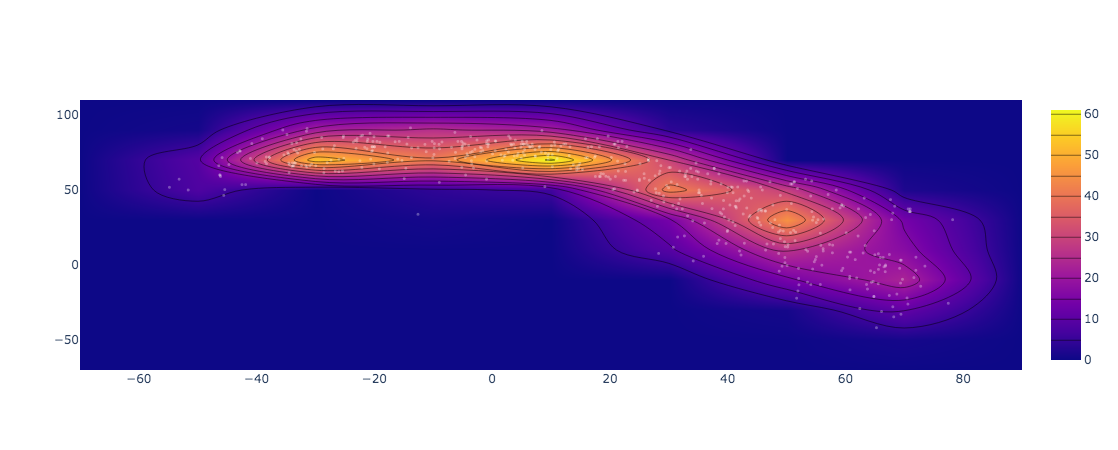

In [5]:
x = c_df['Lat']
y_1 = c_df['Max Temp']

iplot([go.Histogram2dContour(x = x, y = y_1, contours = dict(coloring = 'heatmap')),
       go.Scatter(x = x, y = y_1, mode = 'markers', marker = dict(color = 'white', size = 3, opacity = 0.3))], show_link = False)

# figure = {'data': [{'x': [0, 1], 'y': [0, 1]}],'layout': {'title': 'Start Title', 'xaxis':"X Title", 'yaxis': "Y Title"}}

# iplot(figure)

#Save and Show Figure
# go.show(renderer="png")
# plt.savefig('lat_vs_max_temp_PLOTLY.png')

#### Latitude vs. Humidity Plot

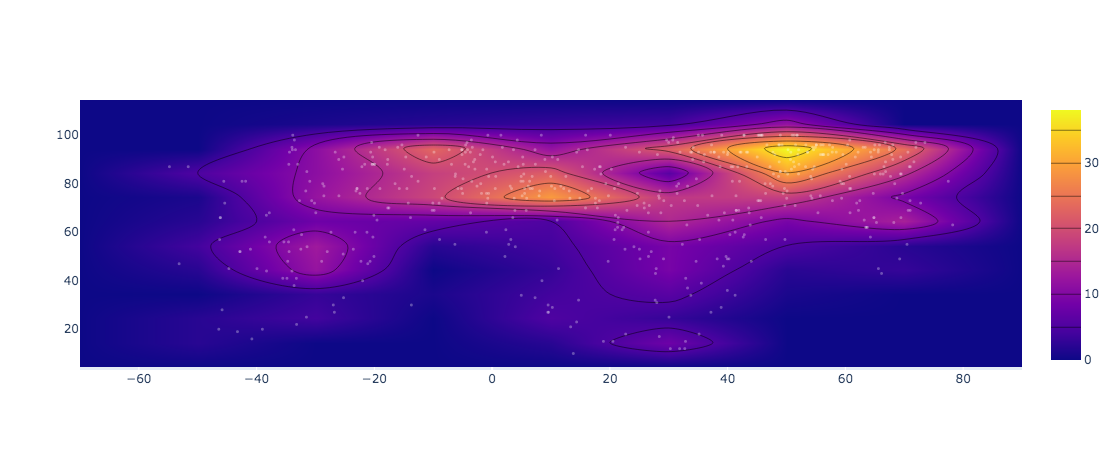

In [6]:
y_2 = c_df['Humidity']

iplot([go.Histogram2dContour(x = x, y = y_2, contours = dict(coloring = 'heatmap')),
       go.Scatter(x = x, y = y_2, mode = 'markers', marker = dict(color = 'white', size = 3, opacity = 0.3))], show_link = False)

#Save and Show Figure
# plt.savefig('lat_vs_humidity_PLOTLY.png')

#### Latitude vs. Cloudiness Plot

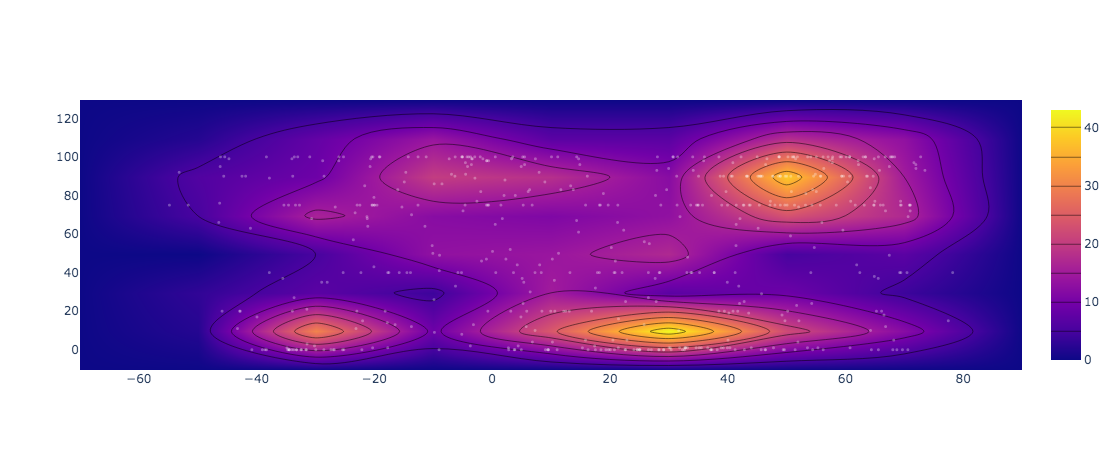

In [7]:
y_3 = c_df['Cloudiness']

iplot([go.Histogram2dContour(x = x, y = y_3, contours = dict(coloring = 'heatmap')),
       go.Scatter(x = x, y = y_3, mode = 'markers', marker = dict(color = 'white', size = 3, opacity = 0.3))], show_link = False)

#Save and Show Figure
# plt.savefig('lat_vs_cloudiness_PLOTLY.png')

#### Latitude vs. Wind Speed Plot

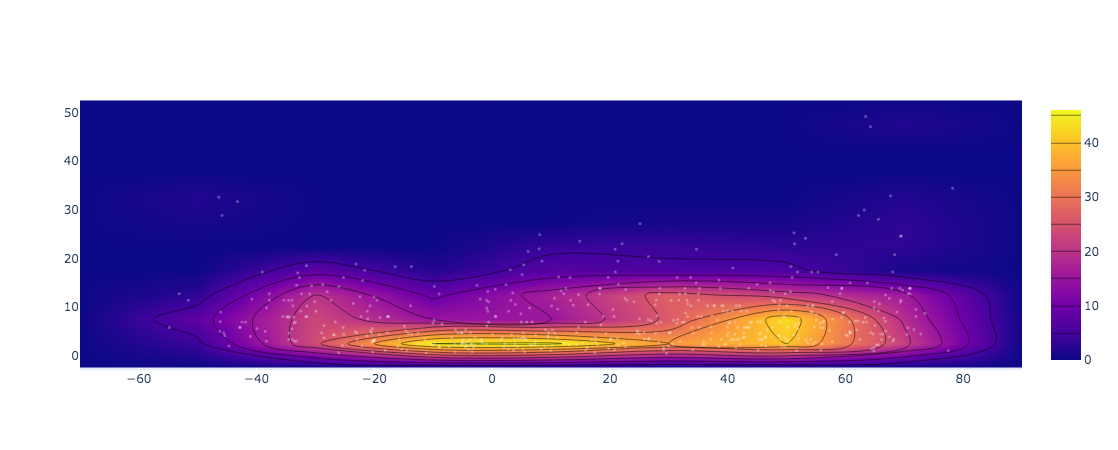

In [8]:
y_4 = c_df['Wind Speed']

iplot([go.Histogram2dContour(x = x, y = y_4, contours = dict(coloring = 'heatmap')),
       go.Scatter(x = x, y = y_4, mode = 'markers', marker = dict(color = 'white', size = 3, opacity = 0.3))], show_link = False)

#Save and Show Figure
# plt.savefig('lat_vs_wind_speed_PLOTLY.png')